In [1]:
!pip install -e gym-rl_trading/

Obtaining file:///home/sauxpa/github/reinforcement_trading/gym-rl_trading
  Found existing installation: gym-rl-trading 0.0.1
    Uninstalling gym-rl-trading-0.0.1:
      Successfully uninstalled gym-rl-trading-0.0.1
  Running setup.py develop for gym-rl-trading


In [2]:
import gym
import gym_rl_trading
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
def test_env(n):
    env = gym.make('rl_trading-v' + str(n))

    done = False
    env.reset()
    history_obs = []
    history_reward = []
    while not done:
        # 0 means 'buy'
        obs, reward, done, _ = env.step(0)
        history_obs.append(obs[-1])
        history_reward.append(reward)
        
    return env, history_obs, history_reward

### Check all environments.
No agent is trained, 'buy' is selected at every turn.

/home/sauxpa/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float64
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


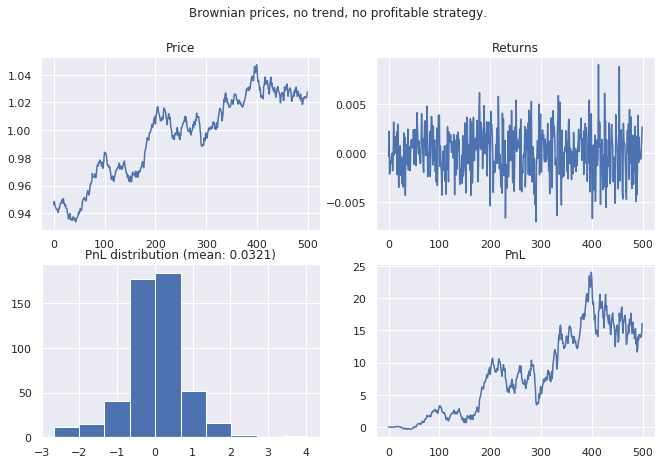

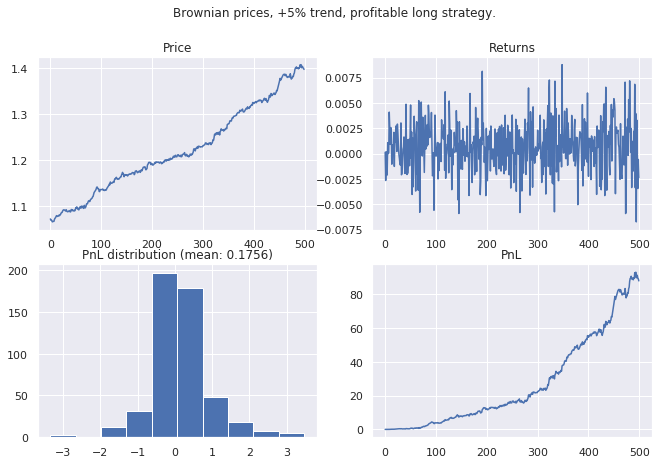

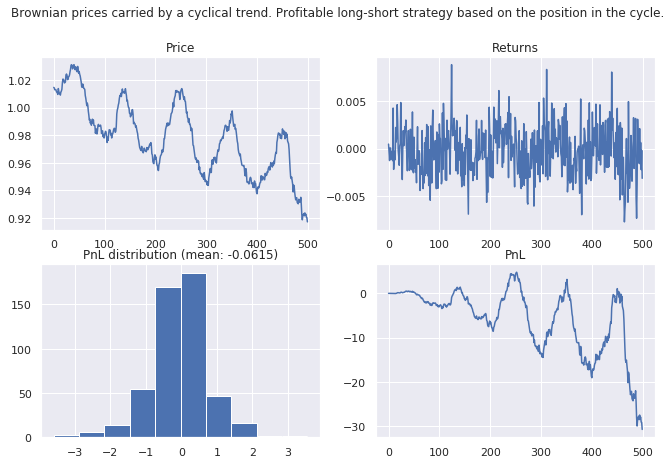

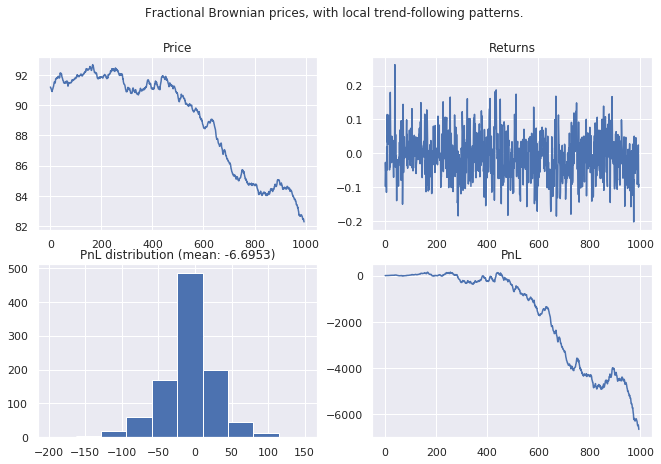

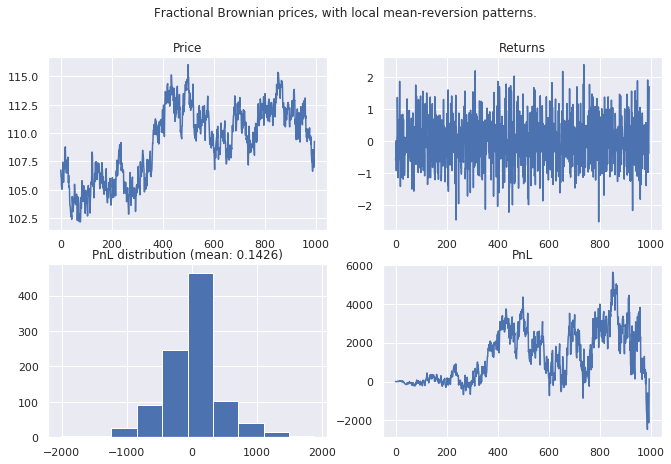

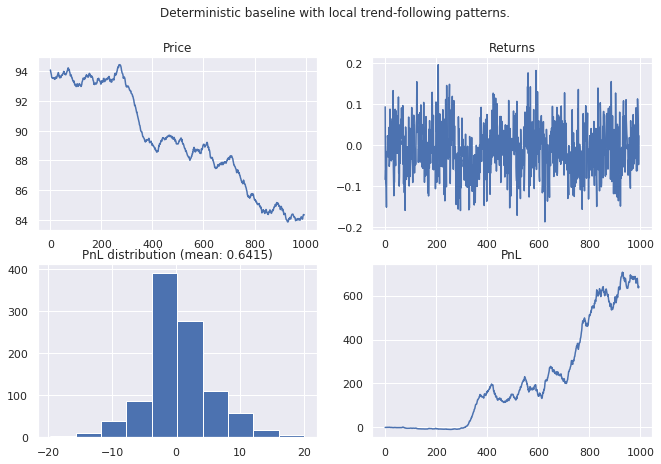

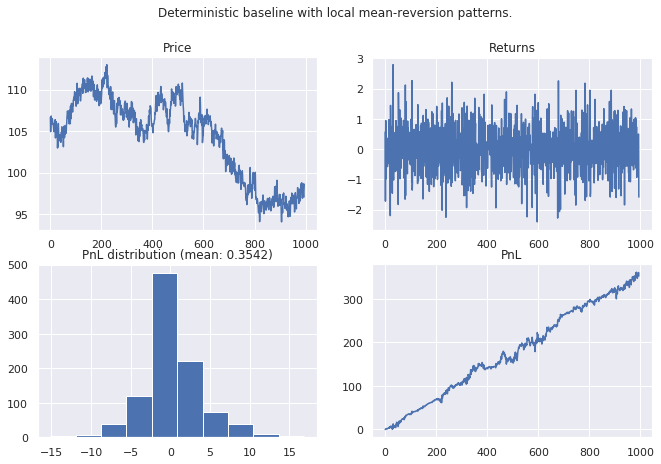

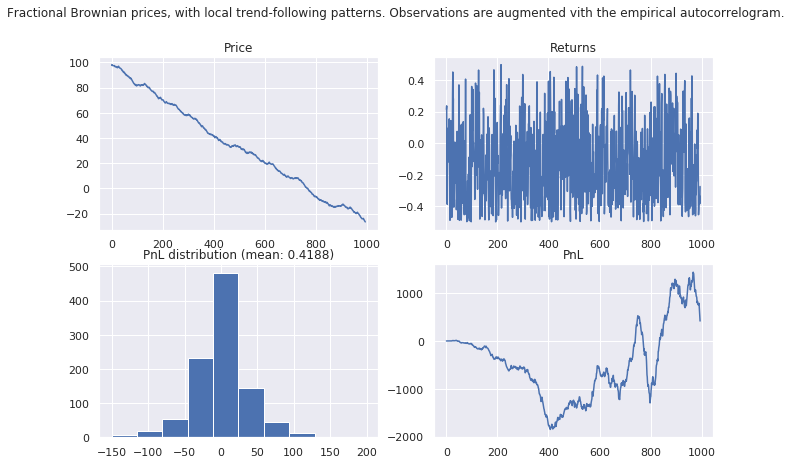

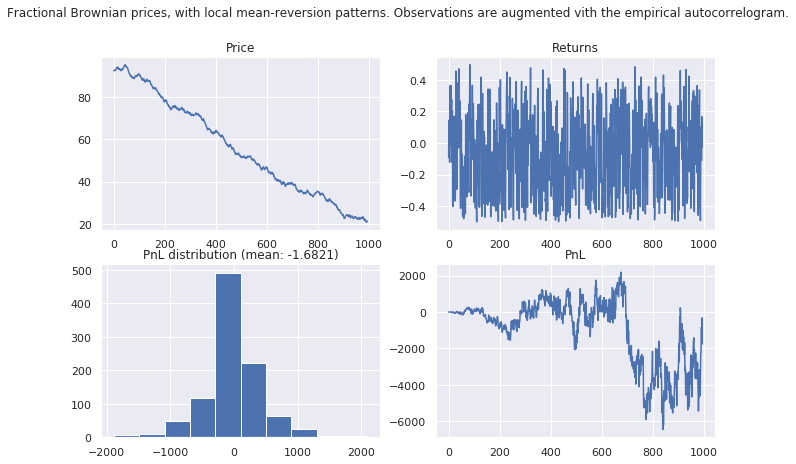

In [4]:
for n in range(9):
    env, history_obs, history_reward = test_env(n)
    fig, axes = plt.subplots(figsize=(11, 7), nrows=2, ncols=2)

    fig.suptitle(env.description)

    ax = axes[0, 0]
    ax.plot(np.cumsum(history_obs)+env.init_price)
    ax.set_title('Price')

    ax = axes[0, 1]
    ax.plot(history_obs)
    ax.set_title('Returns')

    ax = axes[1, 0]
    ax.hist(history_reward)
    ax.set_title('PnL distribution (mean: {:.4f})'.format(np.mean(history_reward)))

    ax = axes[1, 1]
    ax.plot(np.cumsum(history_reward))
    ax.set_title('PnL')

    plt.show()